In [1]:
#Import Statements
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import (precision_recall_curve, average_precision_score, PrecisionRecallDisplay)
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score


import keras
from keras import layers

## ConvMol Featuriser

In [2]:
#GraphConv featuriser - splitting the training dataset into smaller datasets
tasks, datasets, transformers = dc.molnet.load_tox21(
    featurizer = dc.feat.ConvMolFeaturizer(),
    save_dir=r'C:\Users\ym20201\Documents\Datasets',
    data_dir=r'C:\Users\ym20201\Documents\Datasets')

# featurizer = dc.feat.ConvMolFeaturizer()
splitter = dc.splits.RandomSplitter()

# train_data, valid_data,test_data = splitter.train_valid_test_split(
#     datasets[0], 
#     frac_train = 0.8, frac_valid = 0.08, frac_test = 0.12)

train_data, valid_data,test_data = datasets


## Graph Convolutional Model

In [8]:
#Model 1
convmol_model1 = dc.models.GraphConvModel(
    n_tasks = len(tasks),
    graph_conv_layers=[64,64], #default
    dense_layer_size=128,
    dropout=0.0,
    mode='classification',
    number_atom_features=75,#default
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [9]:
#Model 2
convmol_model2 = dc.models.GraphConvModel(
    n_tasks = len(tasks),
    graph_conv_layers=[32,32],
    dense_layer_size=128,
    dropout=0.0,
    mode='classification',
    number_atom_features=75,#default value
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [15]:
#Model 3
convmol_model3 = dc.models.GraphConvModel(
    n_tasks = len(tasks),
    graph_conv_layers=[32,32],
    dense_layer_size=128,
    dropout=0.2,
    mode='classification',
    number_atom_features=75,#default value
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [21]:
#Model 4
convmol_model4 = dc.models.GraphConvModel(
    n_tasks = len(tasks),
    graph_conv_layers=[64,32],
    dense_layer_size=250,
    dropout=0.0,
    mode='classification',
    number_atom_features=75,#default value
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [32]:
#Model 5
convmol_model5 = dc.models.GraphConvModel(
    n_tasks = len(tasks),
    graph_conv_layers=[64,32,32],
    dense_layer_size=250,
    dropout=0.0,
    mode='classification',
    number_atom_features=75,#default value
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [44]:
#Model 6
convmol_model6 = dc.models.GraphConvModel(
    n_tasks = len(tasks),
    graph_conv_layers=[32,32,32],
    dense_layer_size=128,
    dropout=0.0,
    mode='classification',
    number_atom_features=75,#default value
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [40]:
#Model 7
convmol_model7 = dc.models.GraphConvModel(
    n_tasks = len(tasks),
    graph_conv_layers=[64,32,16],
    dense_layer_size=128,
    dropout=0.0,
    mode='classification',
    number_atom_features=75,#default value
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [47]:
#### Best performing models - 2, 4, 6
convmol_model2.fit(
    train_data,
    nb_epoch=10)

convmol_model4.fit(
    train_data,
    nb_epoch=10)

convmol_model6.fit(
    train_data,
    nb_epoch=10)

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_14:0", shape=(483,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_13:0", shape=(483, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_17:0", shape=(1580,), dtype=int32), values=Tensor("gradient_

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_conv_38/Reshape_11:0", shape=(483,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_conv_38/Reshape_10:0", shape=(483, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_conv_38/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_conv_38/Reshape_13:0", shape=(1580,), dtype=int32), values=Tensor("gradient_ta

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_14:0", shape=(409,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_13:0", shape=(409, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_17:0", shape=(1336,), dtype=int32), values=Tensor("gradient_

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_37/Reshape_14:0", shape=(409,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_37/Reshape_13:0", shape=(409, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_37/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_37/Reshape_17:0", shape=(1336,), dtype=int32), values=Tensor("gradient_

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_38/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_38/Reshape_13:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_38/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_38/Reshape_17:0", shape=(None,), dtype=int32), values=Tensor("gradien

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_26:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_25:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Cast_8:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_39/Reshape_29:0", shape=(None,), dtype=int32), values=Tensor("gradien

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_conv_38/Reshape_19:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_conv_38/Reshape_18:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_conv_38/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_15/graph_pool_37/Reshape_32:0", shape=(None,), dtype=int32), values=Tensor("gradien

0.829387919108073

In [42]:
# metric = dc.metrics.Metric(dc.metrics.roc_auc_score) #doesnt work

#Accuracy classification score
metric = dc.metrics.Metric(dc.metrics.balanced_accuracy_score)
recall_metric = dc.metrics.Metric(dc.metrics.recall_score)
metric2 = dc.metrics.Metric(dc.metrics.f1_score)

convmol_model7.evaluate(train_data, [metric, recall_metric, metric2], transformers)

{'balanced_accuracy_score': 0.736286987448692,
 'recall_score': 0.8218398336814174,
 'f1_score': 0.22500755213998772}

In [48]:
m2_gc_pred = convmol_model2.predict(test_data)
m4_gc_pred = convmol_model4.predict(test_data)
m6_gc_pred = convmol_model6.predict(test_data)

In [50]:
#Function for accessing y_true of each assay
def y_true(assay_num, test_data):
    y_true = []
    for i in range(len(test_data.y)):
        y_true.append(test_data.y[i][assay_num - 1])
        
    return y_true

def y_pred(assay_num, pred_data):
    y_pred = []
    for i in range(len(pred_data)):
        y_pred.append( pred_data[i][assay_num - 1][0])
#         y_pred = pred_data[i][assay_num - 1] #not sure which one
    
    return y_pred

In [51]:
#y_true of each assay
y_true_1 = y_true(1, test_data)
y_true_2 = y_true(2, test_data)
y_true_3 = y_true(3, test_data)
y_true_4 = y_true(4, test_data)
y_true_5 = y_true(5, test_data)
y_true_6 = y_true(6, test_data)
y_true_7 = y_true(7, test_data)
y_true_8 = y_true(8, test_data)
y_true_9 = y_true(9, test_data)
y_true_10 = y_true(10, test_data)
y_true_11 = y_true(11, test_data)
y_true_12 = y_true(12, test_data)

y_true = [y_true_1, y_true_2, y_true_3, y_true_4, y_true_5, 
        y_true_6, y_true_7, y_true_8, y_true_9, y_true_10,
        y_true_11, y_true_12]

### Model 2 - y_pred

In [52]:
#y_pred of each assay
m2_y_pred_1 = y_pred(1, m2_gc_pred)
m2_y_pred_2 = y_pred(2, m2_gc_pred)
m2_y_pred_3 = y_pred(3, m2_gc_pred)
m2_y_pred_4 = y_pred(4, m2_gc_pred)
m2_y_pred_5 = y_pred(5, m2_gc_pred)
m2_y_pred_6 = y_pred(6, m2_gc_pred)
m2_y_pred_7 = y_pred(7, m2_gc_pred)
m2_y_pred_8 = y_pred(8, m2_gc_pred)
m2_y_pred_9 = y_pred(9, m2_gc_pred)
m2_y_pred_10 = y_pred(10, m2_gc_pred)
m2_y_pred_11 = y_pred(11, m2_gc_pred)
m2_y_pred_12 = y_pred(12, m2_gc_pred)

In [53]:
def round_pred(y_pred):
    y_pred_new = []
    for i in range(len(y_pred)):
        if y_pred[i] < 0.5:
            new = 0
        else:
            new = 1
        y_pred_new.append(new)
    return y_pred_new

In [54]:
#Rounding predicted probabilities to binary values
m2_y_pred_new_1 = round_pred(m2_y_pred_1)
m2_y_pred_new_2 = round_pred(m2_y_pred_2)
m2_y_pred_new_3 = round_pred(m2_y_pred_3)
m2_y_pred_new_4 = round_pred(m2_y_pred_4)
m2_y_pred_new_5 = round_pred(m2_y_pred_5)
m2_y_pred_new_6 = round_pred(m2_y_pred_6)
m2_y_pred_new_7= round_pred(m2_y_pred_7)
m2_y_pred_new_8 = round_pred(m2_y_pred_8)
m2_y_pred_new_9 = round_pred(m2_y_pred_9)
m2_y_pred_new_10 = round_pred(m2_y_pred_10)
m2_y_pred_new_11 = round_pred(m2_y_pred_11)
m2_y_pred_new_12 = round_pred(m2_y_pred_12)

In [65]:
m2_y_pred = [m2_y_pred_1, m2_y_pred_2, m2_y_pred_3, m2_y_pred_4, m2_y_pred_5, 
             m2_y_pred_6, m2_y_pred_7, m2_y_pred_8, m2_y_pred_9, m2_y_pred_10,
            m2_y_pred_11, m2_y_pred_12]

m2_y_pred_new = [m2_y_pred_new_1, m2_y_pred_new_2, m2_y_pred_new_3, m2_y_pred_new_4, m2_y_pred_new_5, 
             m2_y_pred_new_6, m2_y_pred_new_7, m2_y_pred_new_8, m2_y_pred_new_9, m2_y_pred_new_10,
            m2_y_pred_new_11, m2_y_pred_new_12]

### Model 4 - y_pred

In [55]:
#y_pred of each assay
m4_y_pred_1 = y_pred(1, m4_gc_pred)
m4_y_pred_2 = y_pred(2, m4_gc_pred)
m4_y_pred_3 = y_pred(3, m4_gc_pred)
m4_y_pred_4 = y_pred(4, m4_gc_pred)
m4_y_pred_5 = y_pred(5, m4_gc_pred)
m4_y_pred_6 = y_pred(6, m4_gc_pred)
m4_y_pred_7 = y_pred(7, m4_gc_pred)
m4_y_pred_8 = y_pred(8, m4_gc_pred)
m4_y_pred_9 = y_pred(9, m4_gc_pred)
m4_y_pred_10 = y_pred(10, m4_gc_pred)
m4_y_pred_11 = y_pred(11, m4_gc_pred)
m4_y_pred_12 = y_pred(12, m4_gc_pred)

In [56]:
#Rounding predicted probabilities to binary values
m4_y_pred_new_1 = round_pred(m4_y_pred_1)
m4_y_pred_new_2 = round_pred(m4_y_pred_2)
m4_y_pred_new_3 = round_pred(m4_y_pred_3)
m4_y_pred_new_4 = round_pred(m4_y_pred_4)
m4_y_pred_new_5 = round_pred(m4_y_pred_5)
m4_y_pred_new_6 = round_pred(m4_y_pred_6)
m4_y_pred_new_7= round_pred(m4_y_pred_7)
m4_y_pred_new_8 = round_pred(m4_y_pred_8)
m4_y_pred_new_9 = round_pred(m4_y_pred_9)
m4_y_pred_new_10 = round_pred(m4_y_pred_10)
m4_y_pred_new_11 = round_pred(m4_y_pred_11)
m4_y_pred_new_12 = round_pred(m4_y_pred_12)

In [57]:
m4_y_pred = [m4_y_pred_1, m4_y_pred_2, m4_y_pred_3, m4_y_pred_4, m4_y_pred_5, 
             m4_y_pred_6, m4_y_pred_7, m4_y_pred_8, m4_y_pred_9, m4_y_pred_10,
            m4_y_pred_11, m4_y_pred_12]

m4_y_pred_new = [m4_y_pred_new_1, m4_y_pred_new_2, m4_y_pred_new_3, m4_y_pred_new_4, m4_y_pred_new_5, 
             m4_y_pred_new_6, m4_y_pred_new_7, m4_y_pred_new_8, m4_y_pred_new_9, m4_y_pred_new_10,
            m4_y_pred_new_11, m4_y_pred_new_12]

### Model 6 - y_pred

In [58]:
#y_pred of each assay
m6_y_pred_1 = y_pred(1, m6_gc_pred)
m6_y_pred_2 = y_pred(2, m6_gc_pred)
m6_y_pred_3 = y_pred(3, m6_gc_pred)
m6_y_pred_4 = y_pred(4, m6_gc_pred)
m6_y_pred_5 = y_pred(5, m6_gc_pred)
m6_y_pred_6 = y_pred(6, m6_gc_pred)
m6_y_pred_7 = y_pred(7, m6_gc_pred)
m6_y_pred_8 = y_pred(8, m6_gc_pred)
m6_y_pred_9 = y_pred(9, m6_gc_pred)
m6_y_pred_10 = y_pred(10, m6_gc_pred)
m6_y_pred_11 = y_pred(11, m6_gc_pred)
m6_y_pred_12 = y_pred(12, m6_gc_pred)

In [59]:
#Rounding predicted probabilities to binary values
m6_y_pred_new_1 = round_pred(m6_y_pred_1)
m6_y_pred_new_2 = round_pred(m6_y_pred_2)
m6_y_pred_new_3 = round_pred(m6_y_pred_3)
m6_y_pred_new_4 = round_pred(m6_y_pred_4)
m6_y_pred_new_5 = round_pred(m6_y_pred_5)
m6_y_pred_new_6 = round_pred(m6_y_pred_6)
m6_y_pred_new_7= round_pred(m6_y_pred_7)
m6_y_pred_new_8 = round_pred(m6_y_pred_8)
m6_y_pred_new_9 = round_pred(m6_y_pred_9)
m6_y_pred_new_10 = round_pred(m6_y_pred_10)
m6_y_pred_new_11 = round_pred(m6_y_pred_11)
m6_y_pred_new_12 = round_pred(m6_y_pred_12)

In [61]:
m6_y_pred = [m6_y_pred_1, m6_y_pred_2, m6_y_pred_3, m6_y_pred_4, m6_y_pred_5, 
             m6_y_pred_6, m6_y_pred_7, m6_y_pred_8, m6_y_pred_9, m6_y_pred_10,
            m6_y_pred_11, m6_y_pred_12]

m6_y_pred_new = [m6_y_pred_new_1, m6_y_pred_new_2, m6_y_pred_new_3, m6_y_pred_new_4, m6_y_pred_new_5, 
             m6_y_pred_new_6, m6_y_pred_new_7, m6_y_pred_new_8, m6_y_pred_new_9, m6_y_pred_new_10,
            m6_y_pred_new_11, m6_y_pred_new_12]

## Evaluating the model
### Precision and Recall score

In [66]:
#Function to ouput precision, recall, and average precision score
def precision_recall_avgprecision(y_true, y_pred):
    precision_score = []
    recall_score = []
    avg_precision_score = []
    for i in range(len(y_true)):
        precision, recall, _ = precision_recall_curve(y_true[i], y_pred[i])
        avg_precision = average_precision_score(y_true[i], y_pred[i])
        
        precision_score.append(precision)
        recall_score.append(recall)
        avg_precision_score.append(avg_precision)
    
    return precision_score, recall_score, avg_precision_score


In [67]:
def PrecisionRecallPlot(precision, recall, avg, assays):
    precision_recall = []
    for i in range(len(precision)):
        plot = PrecisionRecallDisplay(recall = recall[i], precision = precision[i], average_precision = avg[i])
        precision_recall.append(plot)
        
    for i in range(len(precision_recall)):
        precision_recall[i].plot(ax=ax, label=assays[i])

In [68]:
m2_precision_score, m2_recall_score, m2_avg_precision_score = precision_recall_avgprecision(y_true, m2_y_pred)
m4_precision_score, m4_recall_score, m4_avg_precision_score = precision_recall_avgprecision(y_true, m4_y_pred)
m6_precision_score, m6_recall_score, m6_avg_precision_score = precision_recall_avgprecision(y_true, m6_y_pred)

In [69]:
assays = ['NR-AR', 'NR-AR-LBD','NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
         'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

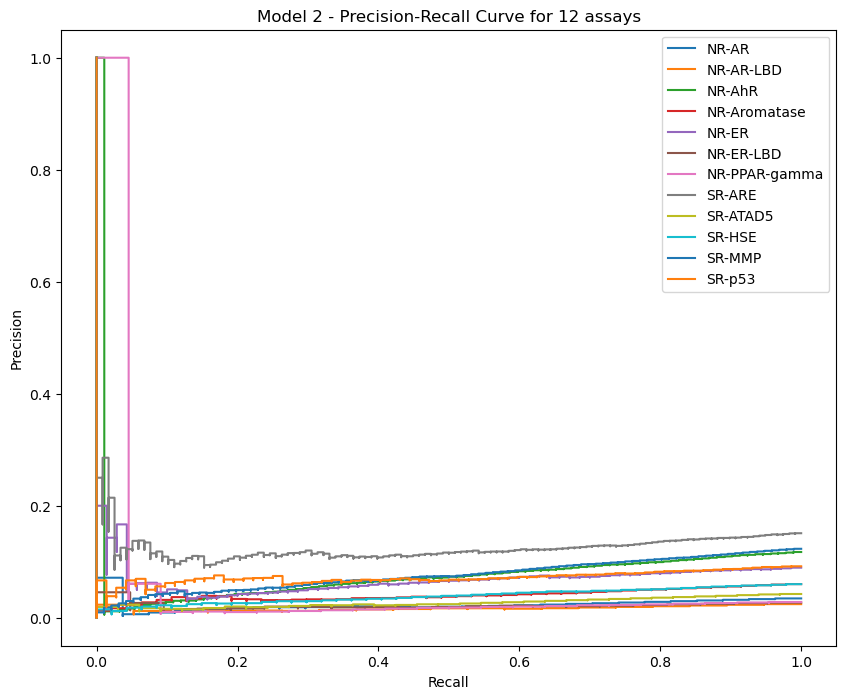

In [71]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m2_precision_score, m2_recall_score, m2_avg_precision_score, assays)

plt.title('Model 2 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')

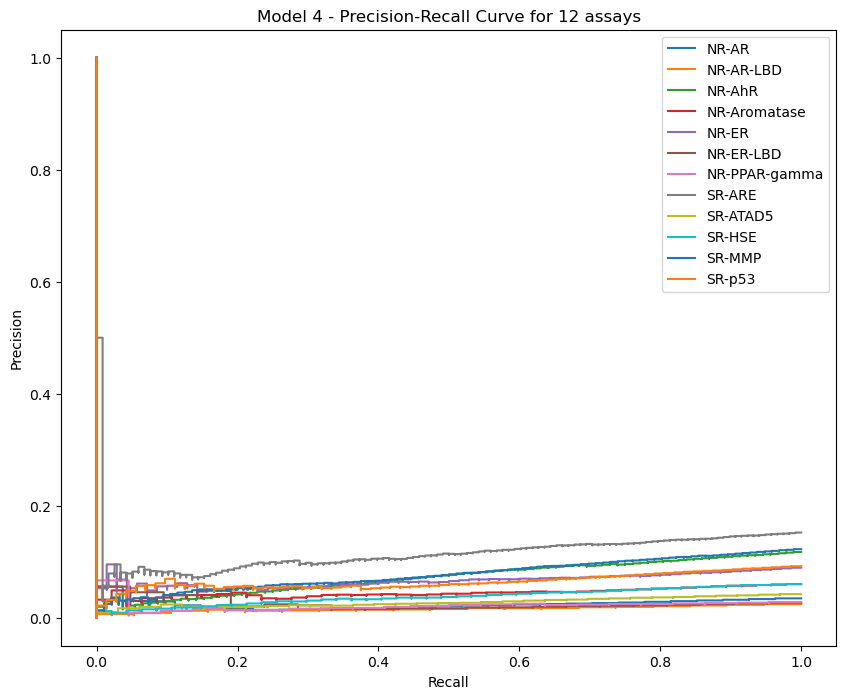

In [72]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m4_precision_score, m4_recall_score, m4_avg_precision_score, assays)

plt.title('Model 4 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')

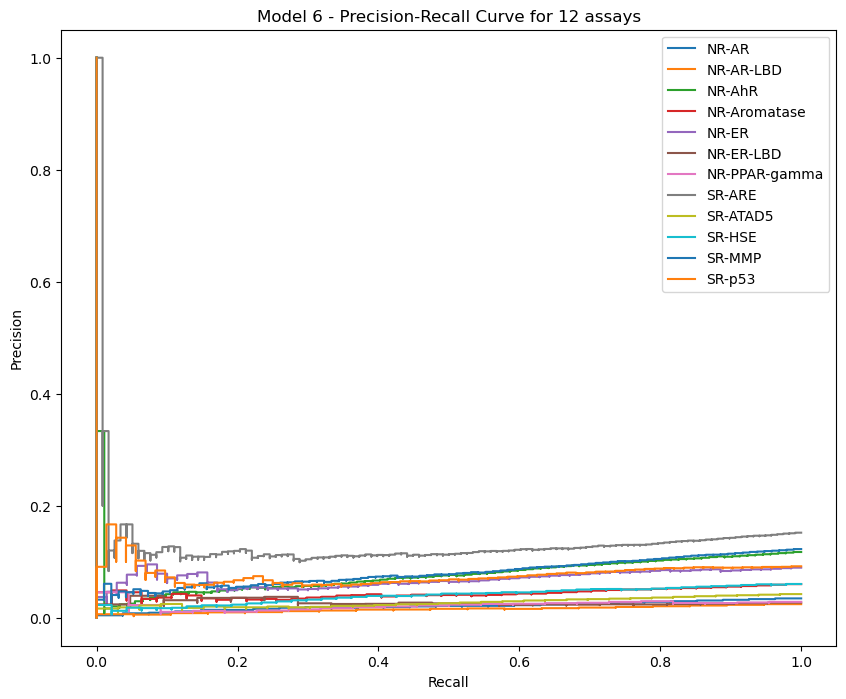

In [73]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m6_precision_score, m6_recall_score, m6_avg_precision_score, assays)

plt.title('Model 6 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')

### Balanced Accuracy Score

In [75]:
def balanced_accuracy(y_true, y_pred):
    balanced_acc = []
    for i in range(len(y_true)):
        b_acc = balanced_accuracy_score(y_true[i], y_pred[i])
        balanced_acc.append(b_acc)
    return balanced_acc

In [76]:
m2_balanced_acc = balanced_accuracy(y_true, m2_y_pred_new)
m4_balanced_acc = balanced_accuracy(y_true, m4_y_pred_new)
m6_balanced_acc = balanced_accuracy(y_true, m6_y_pred_new)

In [87]:
b_acc_means = [np.mean(m2_balanced_acc), np.mean(m4_balanced_acc), np.mean(m6_balanced_acc)]
b_acc_means

[0.3540486659018635, 0.36169583877855205, 0.3967841599350112]

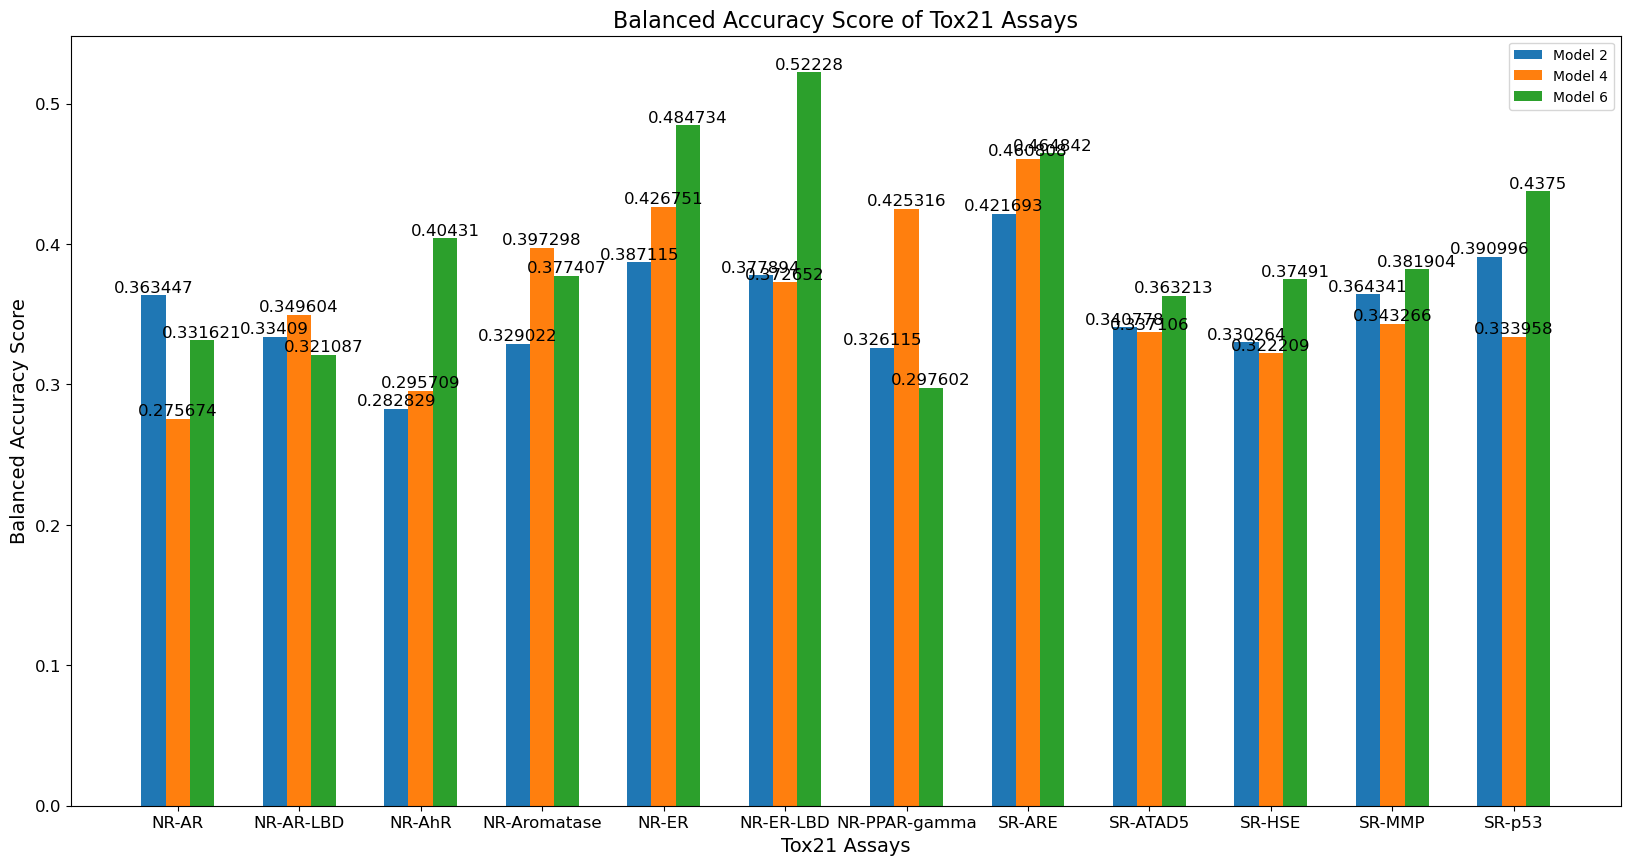

In [77]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_balanced_acc, width, label='Model 2')
plt.bar(x, m4_balanced_acc, width, label='Model 4')
plt.bar(x+0.2, m6_balanced_acc, width, label='Model 6')
plt.title('Balanced Accuracy Score of Tox21 Assays', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
plt.bar_label(ax.containers[0], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[1], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[2], label_type='edge', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

### F1-Score

In [79]:
def f1Score(y_true, y_pred):
    f1_Score = []
    for i in range(len(y_true)):
        f1 = f1_score(y_true[i], y_pred[i])
        f1_Score.append(f1)
    return f1_Score

In [80]:
m2_f1 = f1Score(y_true, m2_y_pred_new)
m4_f1 = f1Score(y_true, m4_y_pred_new)
m6_f1 = f1Score(y_true, m6_y_pred_new)

In [88]:
f1_means = [np.mean(m2_f1), np.mean(m4_f1), np.mean(m6_f1)]
f1_means

[0.0756954049952358, 0.05901168161229001, 0.0594900120589437]

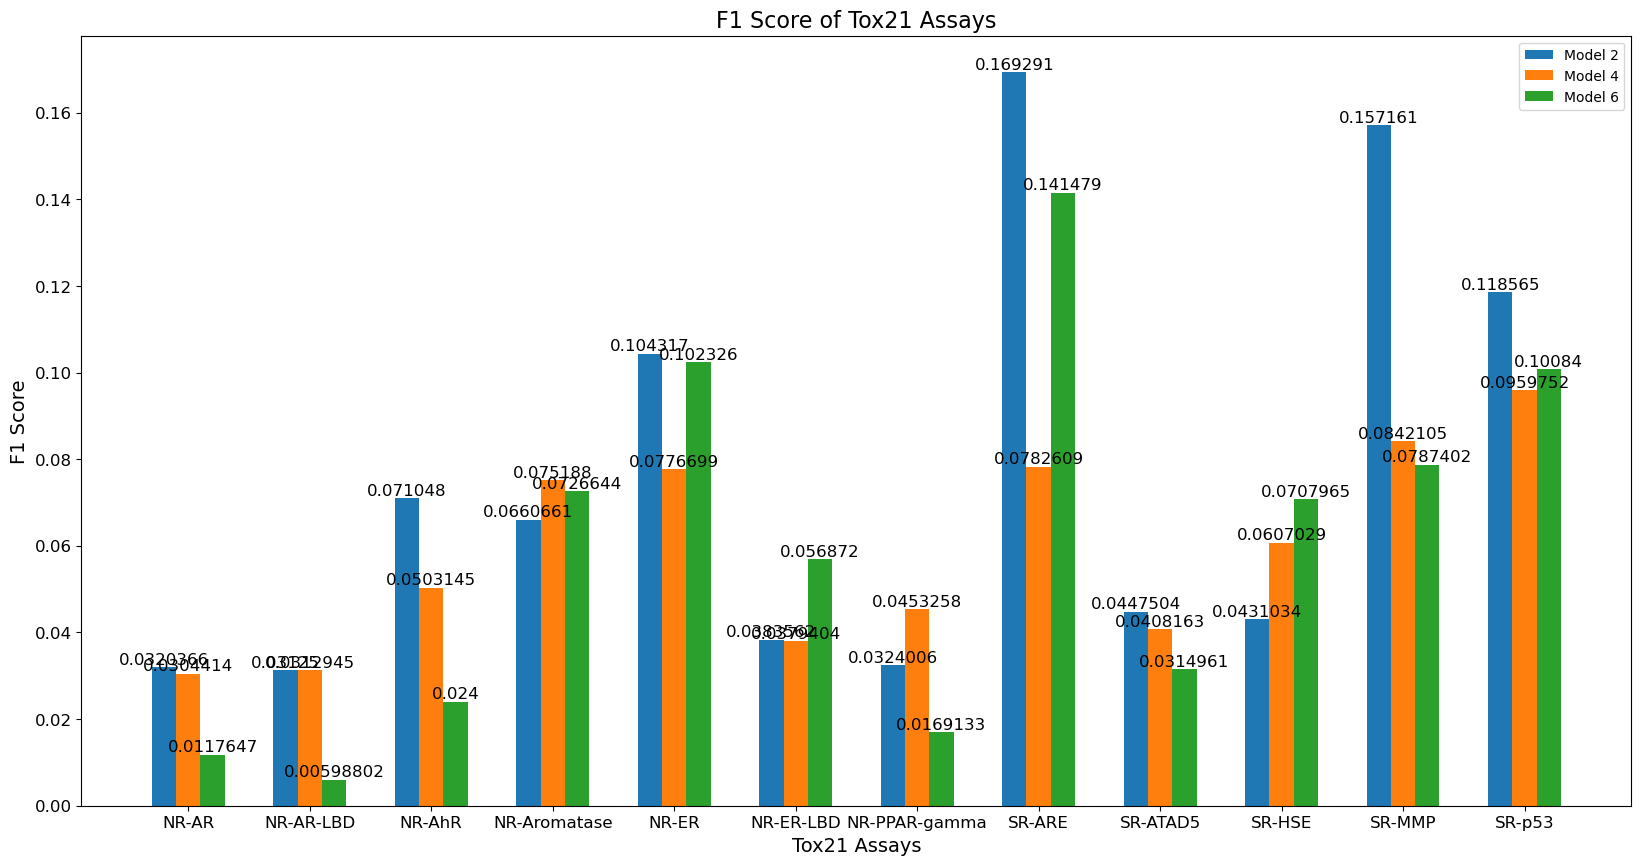

In [81]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_f1, width, label='Model 2')
plt.bar(x, m4_f1, width, label='Model 4')
plt.bar(x+0.2, m6_f1, width, label='Model 6')

plt.title('F1 Score of Tox21 Assays', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
plt.bar_label(ax.containers[0], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[1], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[2], label_type='edge', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

### ROC-AUC Score

In [82]:
# Area Under the Receiver Operating Characteristic(ROC) Curve
def roc_auc(y_true, y_pred):
    rocauc=[]
    for i in range(len(y_true)):
        auroc = roc_auc_score(y_true[i], y_pred[i])
        rocauc.append(auroc)
    return rocauc

In [85]:
m2_roc_auc = roc_auc(y_true, m2_y_pred_new)
m4_roc_auc = roc_auc(y_true, m4_y_pred_new)
m6_roc_auc = roc_auc(y_true, m6_y_pred_new)

In [89]:
roc_means = [np.mean(m2_roc_auc), np.mean(m4_roc_auc), np.mean(m6_roc_auc)]
roc_means

[0.3540486659018635, 0.36169583877855205, 0.3967841599350112]

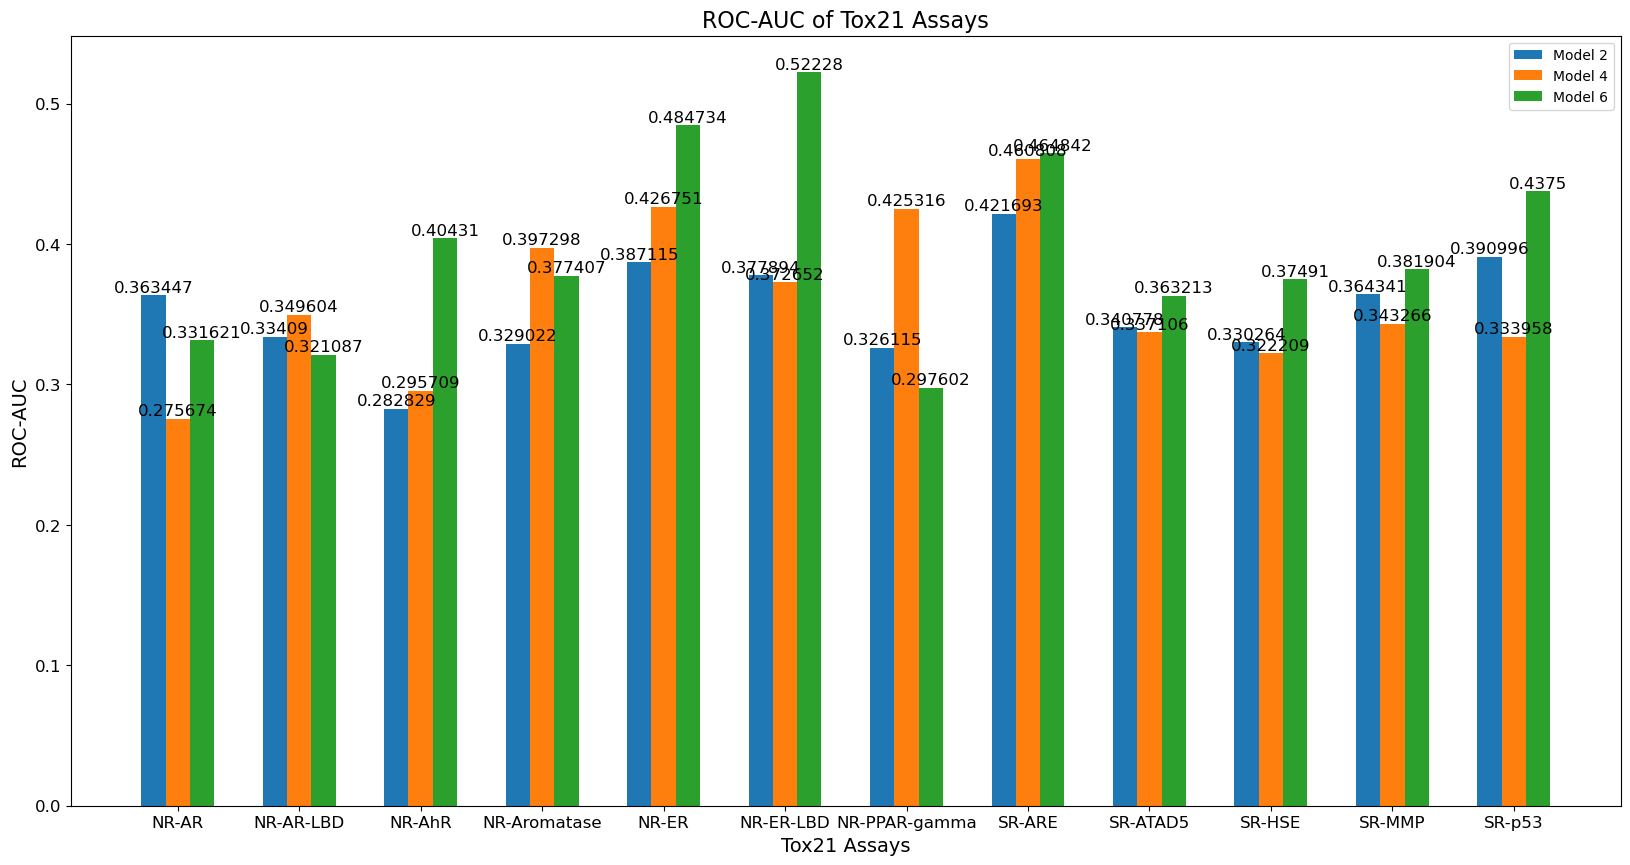

In [86]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))
width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_roc_auc, width, label='Model 2')
plt.bar(x, m4_roc_auc, width, label='Model 4')
plt.bar(x+0.2, m6_roc_auc, width, label='Model 6')

plt.title('ROC-AUC of Tox21 Assays', fontsize=16)
plt.ylabel('ROC-AUC', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
plt.bar_label(ax.containers[0], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[1], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[2], label_type='edge', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

### Keras model

In [8]:
# #epoch - number of times data is shown to NN
# model.fit(train_data, nb_epoch=10) #training model

In [12]:
# #Converting numpy array to tensor
# train_tensor = []
# for i in range(len(train_feat)):
#     tensor = tf.convert_to_tensor(train_feat[i])
#     train_tensor.append(tensor)
    
# valid_tensor = []
# for i in range(len(valid_feat)):
#     tensor_v = tf.convert_to_tensor(valid_feat[i])
#     valid_tensor.append(tensor_v)
    
# test_tensor = []
# for i in range(len(test_feat)):
#     tensor_t = tf.convert_to_tensor(test_feat[i])
#     test_tensor.append(tensor_t)

In [22]:
# metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
# print("Training set score:", model.evaluate(train_data, [metric], transformers))
# print("Test set score:", model.evaluate(test_data, [metric], transformers))

In [13]:
# #Constructing the model
# # keras_model = Sequential([
# #     layers.Dense(50, activation='relu'), # hidden layer
# #     layers.Dense(1) # output layer
# # ])

# # model = dc.models.KerasModel(keras_model, dc.models.losses.L1Loss())
# # model.fit(train_feat, nb_epoch=10)

# keras_model = Sequential()
# keras_model.add(layers.Conv2D(filters=32,
#                           kernel_size=3,
#                           activation='relu',
#                           dilation_rate=2,
#                              input_shape=(80, 80, 1)))
# keras_model.add(layers.MaxPooling2D(pool_size=(2,2)))
# #dropout to avoid overfitting
# keras_model.add(layers.Dense(50, activation='relu'))
# keras_model.add(layers.Dense(1))

# keras_model.build()

In [14]:
# keras_model.compile(optimizer='adam', loss='mean_squared_error')
# keras_model.summary()

In [45]:
# tf.convert_to_tensor(train_feat[0])


In [15]:
# keras_model.fit(x=train_feat,
#                 y=train_feat,
#                 epochs=10,
#                 batch_size=512,
#                 shuffle=True,
#                validation_data=(valid_feat, valid_feat))

In [12]:
#Autoencoder